In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Data Science Asignments datasets\EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Data Preprocessing:

In [3]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

<Axes: >

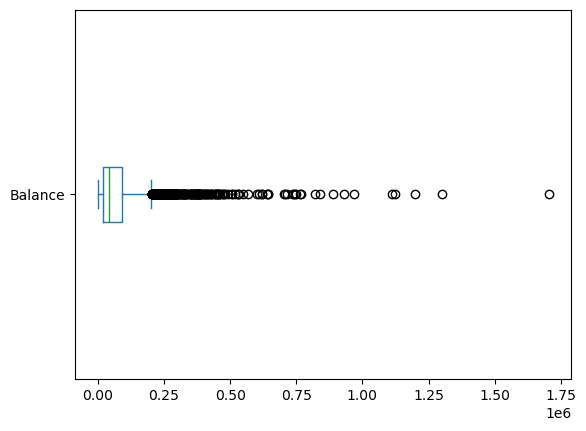

In [4]:
df["Balance"].plot(kind='box',vert=False)

In [5]:
#Treating outliers
import numpy as np
Q1 = np.percentile(df["Balance"],25)
Q3 = np.percentile(df["Balance"],75)
IQR = Q3 - Q1
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [6]:
len(df["Balance"][df["Balance"]>UW])

266

In [7]:
df["Balance"][df["Balance"]>UW] = UW

C:\Users\padal\AppData\Local\Temp\ipykernel_28088\1023018768.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '203218.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df["Balance"][df["Balance"]>UW] = UW


<Axes: >

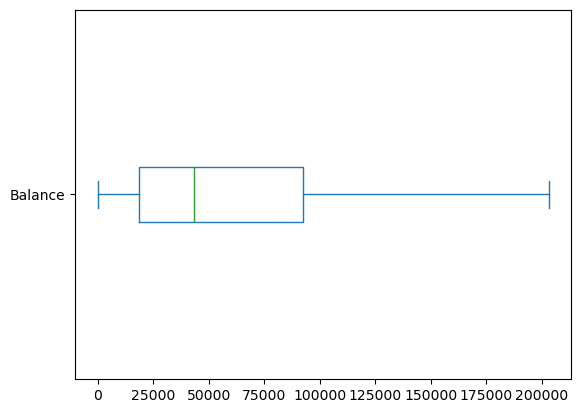

In [8]:
df["Balance"].plot(kind='box',vert=False)

<Axes: >

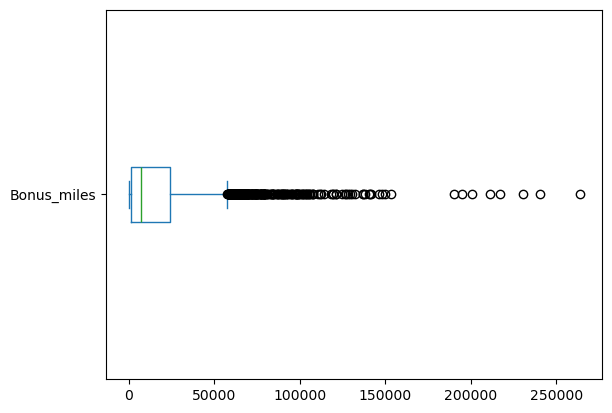

In [9]:
df["Bonus_miles"].plot(kind='box',vert=False)

In [10]:
#Treating outliers
import numpy as np
Q1 = np.percentile(df["Bonus_miles"],25)
Q3 = np.percentile(df["Bonus_miles"],75)
IQR = Q3 - Q1
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [11]:
len(df["Bonus_miles"][df["Bonus_miles"]>UW])

280

In [12]:
df["Bonus_miles"][df["Bonus_miles"]>UW] = UW

C:\Users\padal\AppData\Local\Temp\ipykernel_28088\2616130950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bonus_miles"][df["Bonus_miles"]>UW] = UW
C:\Users\padal\AppData\Local\Temp\ipykernel_28088\2616130950.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '57626.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df["Bonus_miles"][df["Bonus_miles"]>UW] = UW


<Axes: >

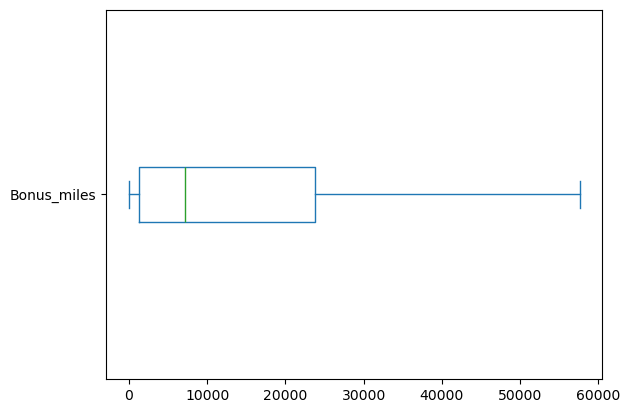

In [13]:
df["Bonus_miles"].plot(kind='box',vert=False)

<Axes: >

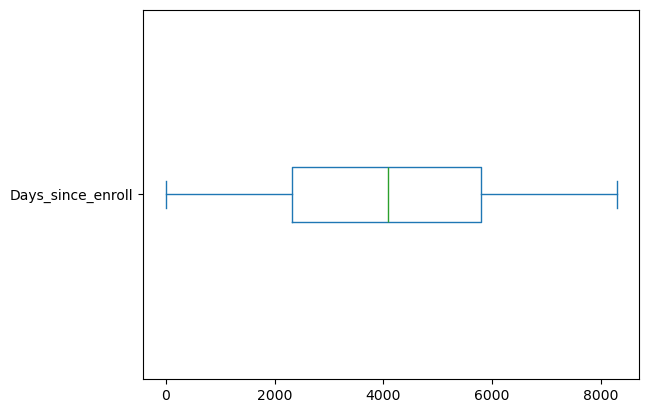

In [14]:
df["Days_since_enroll"].plot(kind='box',vert=False)

In [15]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143.0,0,1,1,1,174.0,1,0,0,7000,0
1,2,19244.0,0,1,1,1,215.0,2,0,0,6968,0
2,3,41354.0,0,1,1,1,4123.0,4,0,0,7034,0
3,4,14776.0,0,1,1,1,500.0,1,0,0,6952,0
4,5,97752.0,0,4,1,1,43300.0,26,2077,4,6935,1


In [16]:
X = df.iloc[:,1:11]

In [17]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(X)
SS_X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.607258,-0.186299,-0.769578,-0.098242,-0.062767,-0.843091,-1.104065,-0.328603,-0.362168,1.395454
1,-0.758947,-0.186299,-0.769578,-0.098242,-0.062767,-0.840822,-0.999926,-0.328603,-0.362168,1.379957
2,-0.382070,-0.186299,-0.769578,-0.098242,-0.062767,-0.624581,-0.791649,-0.328603,-0.362168,1.411920
3,-0.835106,-0.186299,-0.769578,-0.098242,-0.062767,-0.825052,-1.104065,-0.328603,-0.362168,1.372208
4,0.579265,-0.186299,1.409471,-0.098242,-0.062767,1.543191,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,-0.186299,-0.769578,-0.098242,-0.062767,-0.381007,-0.791649,-0.185750,-0.098503,-1.315120
3995,0.010506,-0.186299,-0.769578,-0.098242,-0.062767,-0.798437,-0.687511,-0.328603,-0.362168,-1.318994
3996,0.167530,-0.186299,0.683121,-0.098242,-0.062767,0.555335,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.151188,-0.186299,-0.769578,-0.098242,-0.062767,-0.825052,-1.104065,0.028531,-0.098503,-1.316088


In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pc = pca.fit_transform(X)
pc = pd.DataFrame(pc)
pc

,0,1,2,3,4,5,6,7,8,9
0,-37590.988355,-9246.074924,3361.207298,-57.845342,-75.702586,-4.914836,0.101010,-0.037025,0.013291,-0.006146
1,-46366.105645,-7766.641065,3400.628876,-14.995288,-65.325750,-3.850517,0.044520,-0.052058,0.010585,-0.009705
2,-23915.995185,-7485.693883,3243.705033,-147.330672,-85.196011,-3.258518,-0.050960,-0.342202,-0.014279,-0.028654
3,-50729.173824,-6762.932306,3417.488453,4.855332,-59.722735,-4.895136,0.137629,-0.054408,0.010046,-0.008342
4,38078.478283,22060.746037,2146.259286,1385.007101,-276.613288,2.280759,-1.439581,0.028895,-0.047569,-0.022439
...,...,...,...,...,...,...,...,...,...,...
3994,-45835.981429,502.237693,-2254.979542,-130.965292,-85.565989,-4.455908,0.806579,-0.453690,-0.037118,-0.039160
3995,-1753.912539,-14368.229024,-2538.522472,-513.147972,-132.822866,-1.213220,-0.122419,-0.034148,0.006961,-0.012060
3996,11290.420631,8284.186846,-2883.461087,-712.978459,-107.266636,-5.815866,0.205426,0.316928,-0.006794,0.013338
3997,-11189.556812,-13306.041133,-2474.269249,35.209278,-166.555013,-5.898693,0.098436,0.125666,0.021939,0.005681


# Implementing Clustering Algorithms , Visualization and Evaluation and Performance Metrics:

## Aglomerative Clustering

In [19]:
X = SS_X.iloc[:,0:4]

##### Single Linkage Method

In [20]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=2,linkage='single')
df["single"] = agg_cluster.fit_predict(X)

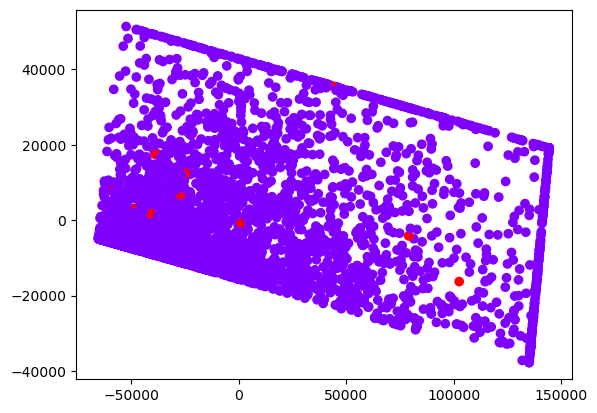

In [21]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["single"], cmap='rainbow')  
plt.show()

In [22]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["single"])
print("single linkage score:", np.round(score,3))

single linkage score: 0.853


In [23]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3,linkage='single')
df["single"] = agg_cluster.fit_predict(X)

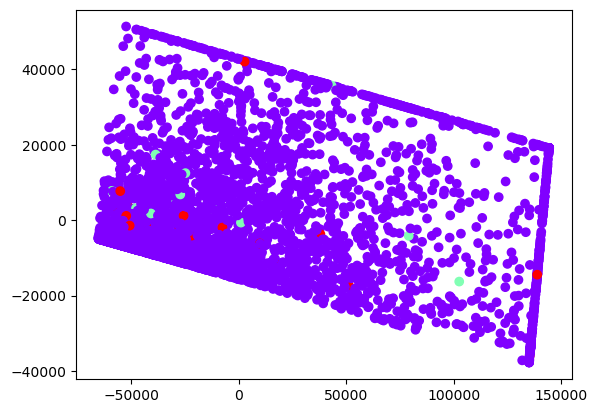

In [24]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["single"], cmap='rainbow')  
plt.show()

In [25]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["single"])
print("single linkage score:", np.round(score,3))

single linkage score: 0.737


In [26]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=4,linkage='single')
df["single"] = agg_cluster.fit_predict(X)

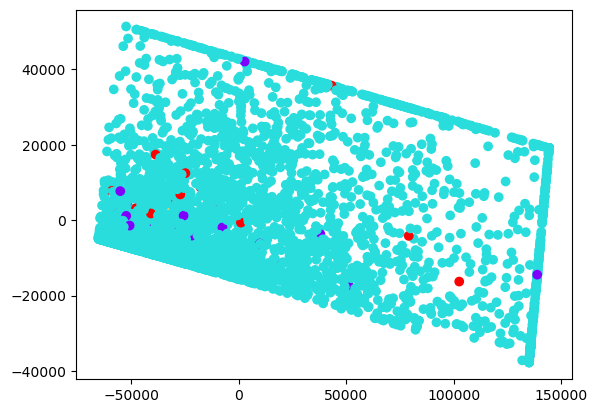

In [27]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["single"], cmap='rainbow')  
plt.show()

In [28]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["single"])
print("single linkage score:", np.round(score,3))

single linkage score: 0.734


##### Complete Linkage Method

In [29]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=2,linkage='complete')
df["complete"] = agg_cluster.fit_predict(X)

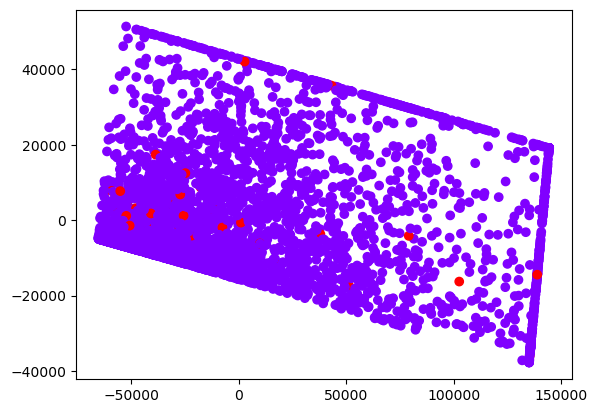

In [30]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["complete"], cmap='rainbow')  
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["complete"])
print("complete linkage score:", np.round(score,3))

complete linkage score: 0.797


In [32]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3,linkage='complete')
df["complete"] = agg_cluster.fit_predict(X)

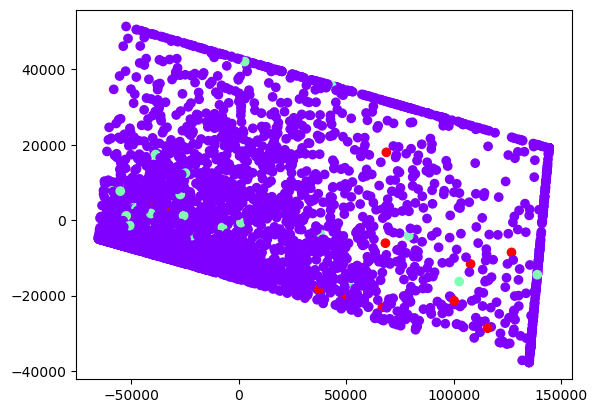

In [33]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["complete"], cmap='rainbow')  
plt.show()

In [34]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["complete"])
print("complete linkage score:", np.round(score,3))

complete linkage score: 0.796


In [35]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=4,linkage='complete')
df["complete"] = agg_cluster.fit_predict(X)

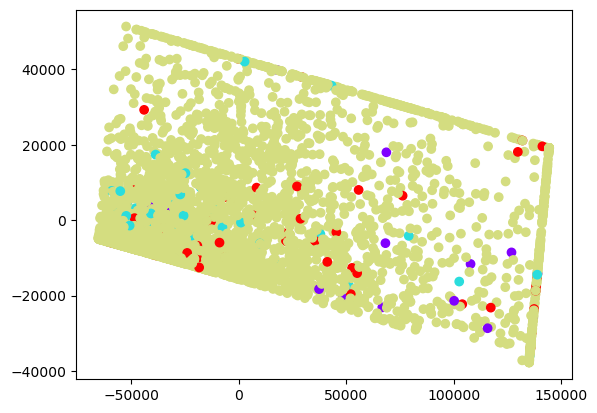

In [36]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["complete"], cmap='rainbow')  
plt.show()

In [37]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["complete"])
print("complete linkage score:", np.round(score,3))

complete linkage score: 0.637


##### Average Linkage Method

In [38]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=4,linkage='average')
df["average"] = agg_cluster.fit_predict(X)

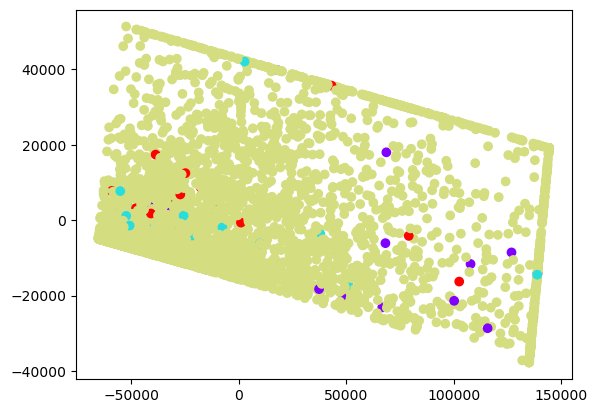

In [39]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["average"], cmap='rainbow')  
plt.show()

In [40]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["average"])
print("average linkage score:", np.round(score,3))

average linkage score: 0.741


In [41]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3,linkage='average')
df["average"] = agg_cluster.fit_predict(X)

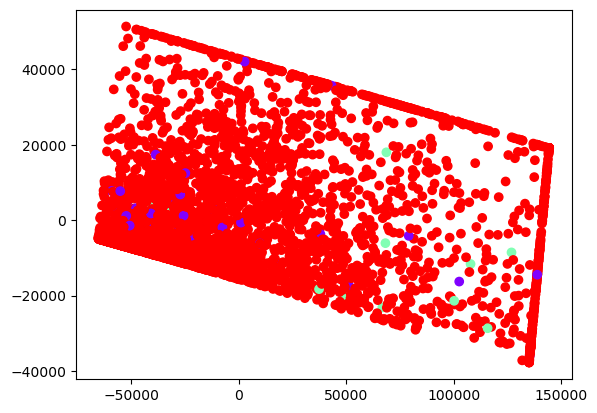

In [42]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["average"], cmap='rainbow')  
plt.show()

In [43]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["average"])
print("average linkage score:", np.round(score,3))

average linkage score: 0.796


In [44]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=2,linkage='average')
df["average"] = agg_cluster.fit_predict(X)

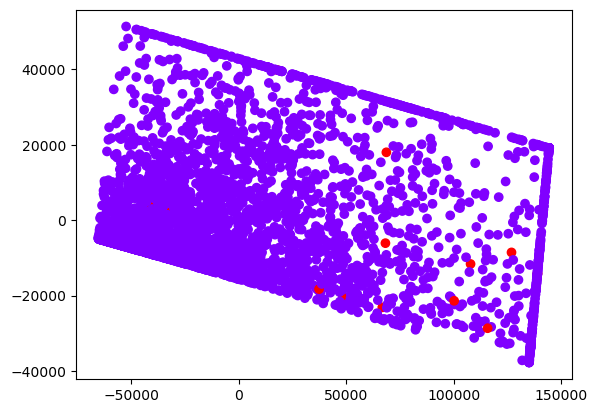

In [45]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["average"], cmap='rainbow')  
plt.show()

In [46]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["average"])
print("average linkage score:", np.round(score,3))

average linkage score: 0.798


In [47]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=5,linkage='average')
df["average"] = agg_cluster.fit_predict(X)

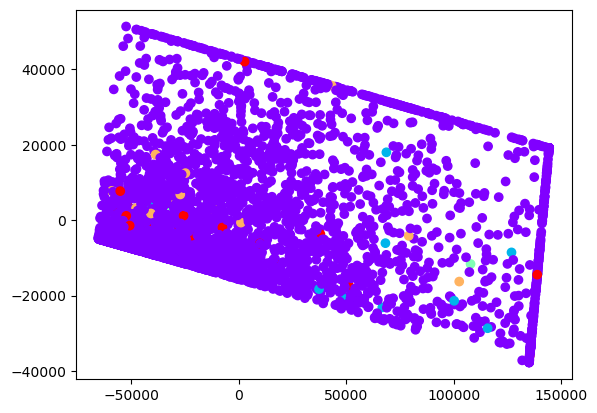

In [48]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["average"], cmap='rainbow')  
plt.show()

In [49]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["average"])
print("average linkage score:", np.round(score,3))

average linkage score: 0.737


##### Ward Linkage Method

In [50]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=5,linkage='ward')
df["ward"] = agg_cluster.fit_predict(X)

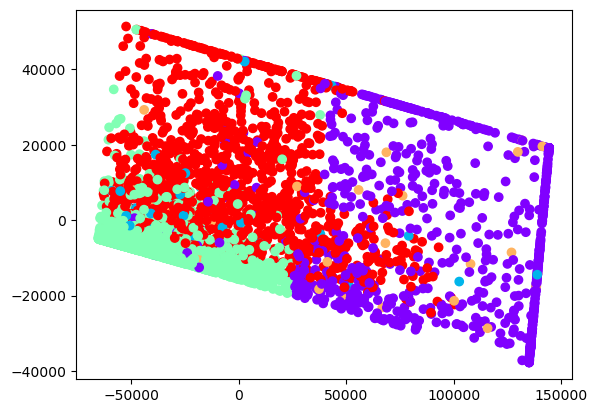

In [51]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["ward"], cmap='rainbow')  
plt.show()

In [52]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["ward"])
print("ward linkage score:", np.round(score,3))

ward linkage score: 0.478


In [53]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=4,linkage='ward')
df["ward"] = agg_cluster.fit_predict(X)

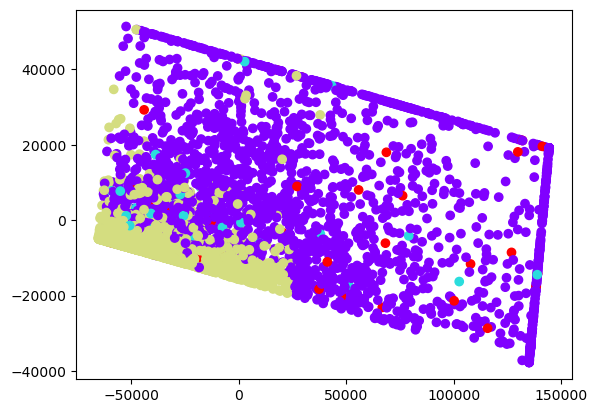

In [54]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["ward"], cmap='rainbow')  
plt.show()

In [55]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["ward"])
print("ward linkage score:", np.round(score,3))

ward linkage score: 0.453


In [56]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')
df["ward"] = agg_cluster.fit_predict(X)

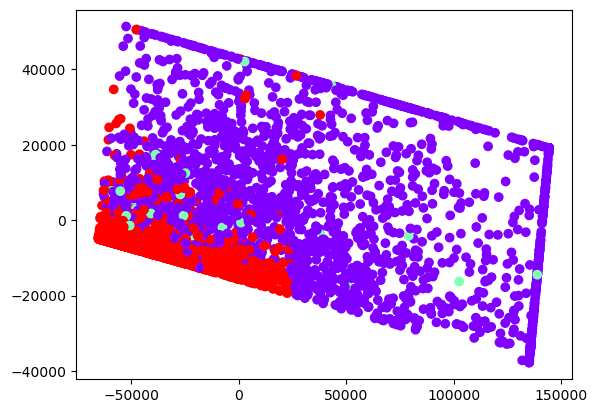

In [57]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["ward"], cmap='rainbow')  
plt.show()

In [58]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["ward"])
print("ward linkage score:", np.round(score,3))

ward linkage score: 0.427


In [59]:
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=2,linkage='ward')
df["ward"] = agg_cluster.fit_predict(X)

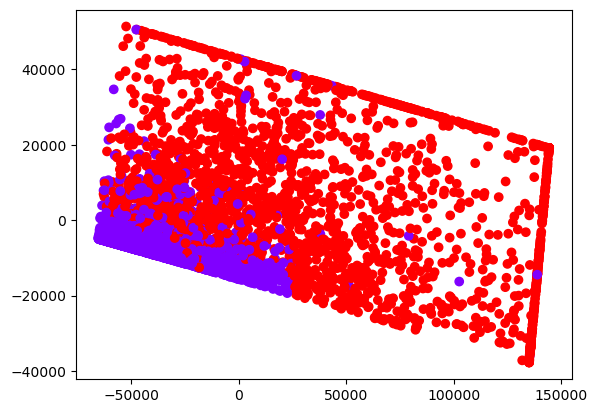

In [60]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["ward"], cmap='rainbow')  
plt.show()

In [61]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["ward"])
print("ward linkage score:", np.round(score,3))

ward linkage score: 0.413


## K-Means Clustering

In [62]:
from sklearn.cluster import KMeans
K_cluster = KMeans(n_clusters=5)
df["K_5"] = K_cluster.fit_predict(X)

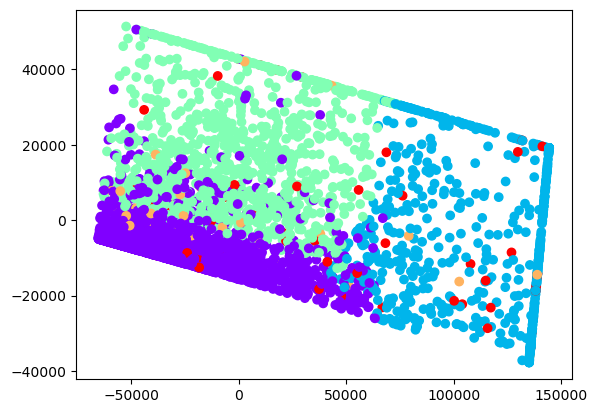

In [63]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["K_5"], cmap='rainbow')  
plt.show()

In [64]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["K_5"])
print("K_5 score:", np.round(score,3))

K_5 score: 0.544


In [65]:
from sklearn.cluster import KMeans
K_cluster = KMeans(n_clusters=4)
df["K_4"] = K_cluster.fit_predict(X)

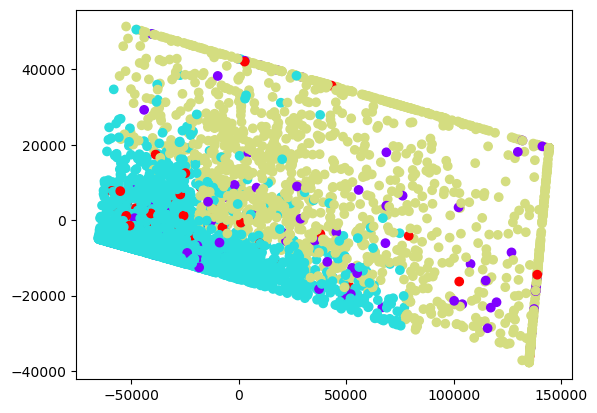

In [66]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["K_4"], cmap='rainbow')  
plt.show()

In [67]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["K_4"])
print("K_4 score:", np.round(score,3))

K_4 score: 0.527


In [68]:
from sklearn.cluster import KMeans
K_cluster = KMeans(n_clusters=3)
df["K_3"] = K_cluster.fit_predict(X)

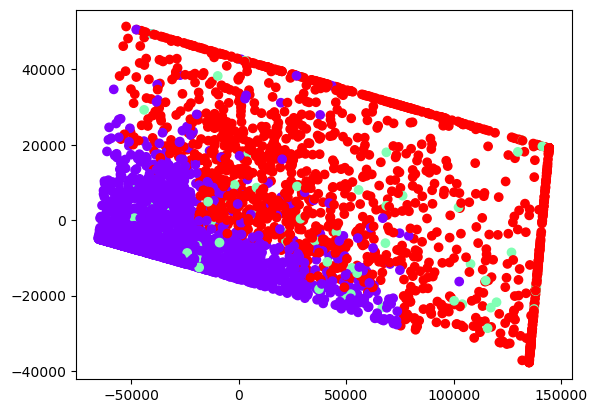

In [69]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["K_3"], cmap='rainbow')  
plt.show()

In [70]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["K_3"])
print("K_3 score:", np.round(score,3))

K_3 score: 0.5


In [110]:
from sklearn.cluster import KMeans
K_cluster = KMeans(n_clusters=2)
df["K_2"] = K_cluster.fit_predict(X)

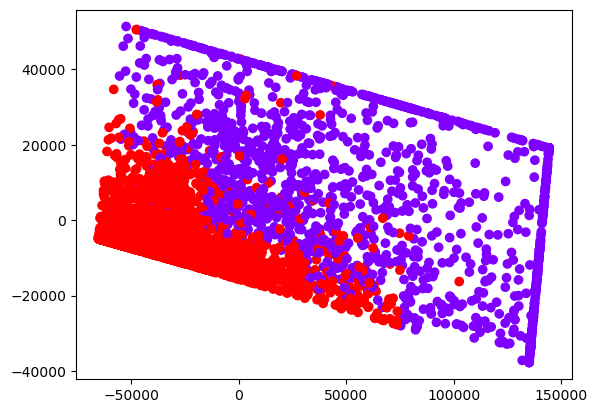

In [111]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["K_2"], cmap='rainbow')  
plt.show()

In [112]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["K_2"])
print("K_2 score:", np.round(score,3))

K_2 score: 0.475


In [107]:
from sklearn.cluster import KMeans
K_cluster = KMeans(n_clusters=7)
df["K_7"] = K_cluster.fit_predict(X)

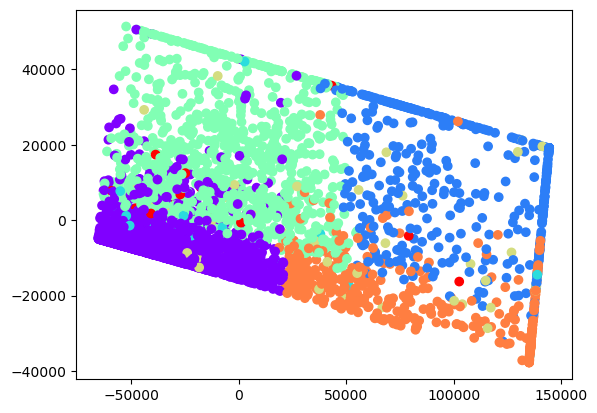

In [108]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["K_7"], cmap='rainbow')  
plt.show()

In [109]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["K_7"])
print("K_7 score:", np.round(score,3))

K_7 score: 0.567


In [77]:
from sklearn.cluster import KMeans
K_cluster = KMeans(n_clusters=6)
df["K_6"] = K_cluster.fit_predict(X)

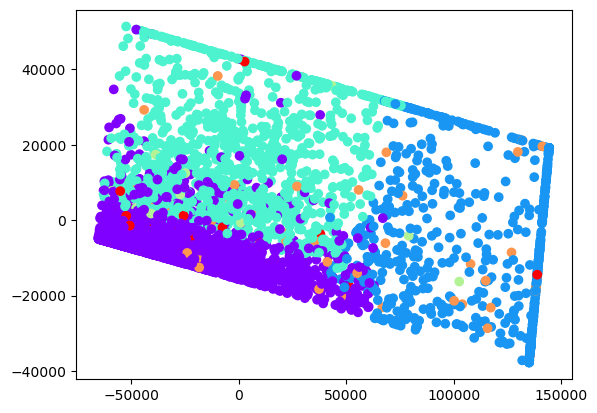

In [78]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["K_6"], cmap='rainbow')  
plt.show()

In [79]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["K_6"])
print("K_6 score:", np.round(score,3))

K_6 score: 0.547


In [80]:
import numpy as np
scores = []

In [81]:
for i in range(2,11,1):
    from sklearn.cluster import KMeans
    K_cluster = KMeans(n_clusters=i)
    df["K"] = K_cluster.fit_predict(X)
    from sklearn.metrics import silhouette_score
    scores.append(silhouette_score(X,df["K"]))

In [82]:
np.round(scores,3)

array([0.797, 0.497, 0.505, 0.536, 0.565, 0.572, 0.578, 0.486, 0.546])

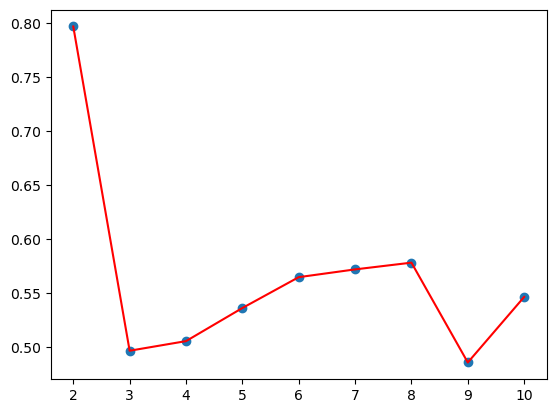

In [83]:
import matplotlib.pyplot as plt
plt.scatter(range(2,11,1),scores)    
plt.plot(range(2,11,1),scores,color='red')
plt.show()

## DBSCAN Clustering

In [84]:
from sklearn.cluster import dbscan
db_cluster = dbscan(X,eps=1,min_samples=4)
df["db_cluster"] = db_cluster[1]

In [85]:
df["db_cluster"].value_counts()

db_cluster
 0    3923
-1      35
 2      24
 1      13
 3       4
Name: count, dtype: int64

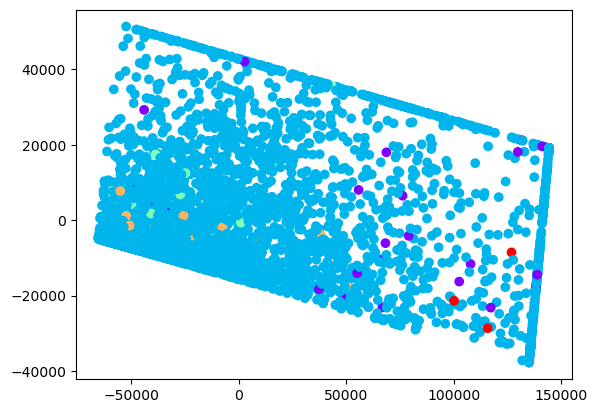

In [86]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["db_cluster"], cmap='rainbow')  
plt.show()

In [87]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["db_cluster"])
print("db_cluster score:", np.round(score,3))

db_cluster score: 0.728


In [88]:
from sklearn.cluster import dbscan
db_cluster = dbscan(X,eps=1,min_samples=3)
df["db_cluster"] = db_cluster[1]

In [89]:
df["db_cluster"].value_counts()

db_cluster
 0    3928
-1      27
 2      24
 1      13
 4       4
 3       3
Name: count, dtype: int64

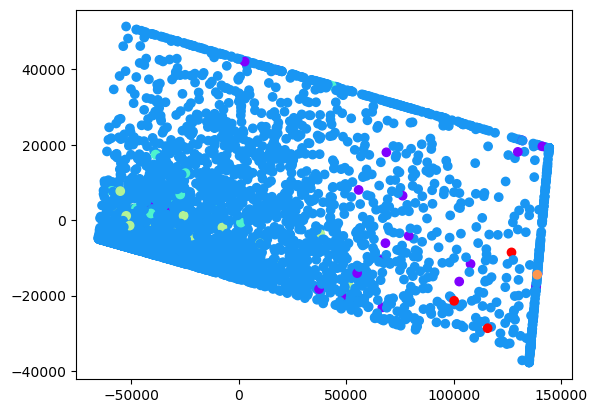

In [90]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["db_cluster"], cmap='rainbow')  
plt.show()

In [91]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["db_cluster"])
print("db_cluster score:", np.round(score,3))

db_cluster score: 0.724


In [92]:
from sklearn.cluster import dbscan
db_cluster = dbscan(X,eps=1,min_samples=2)
df["db_cluster"] = db_cluster[1]

In [93]:
df["db_cluster"].value_counts()

db_cluster
 0    3928
 3      24
-1      19
 2      13
 6       4
 1       3
 4       2
 5       2
 7       2
 8       2
Name: count, dtype: int64

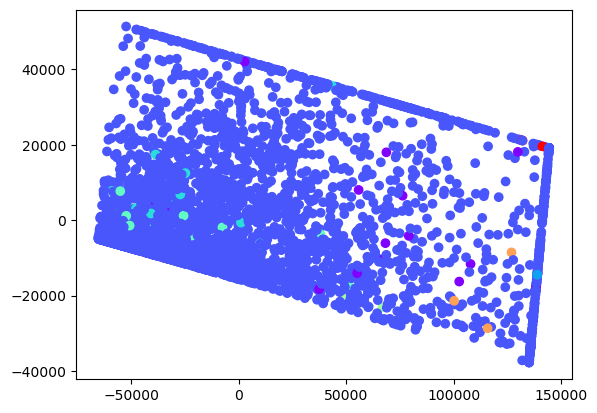

In [94]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["db_cluster"], cmap='rainbow')  
plt.show()

In [95]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["db_cluster"])
print("db_cluster score:", np.round(score,3))

db_cluster score: 0.71


In [96]:
from sklearn.cluster import dbscan
db_cluster = dbscan(X,eps=1,min_samples=5)
df["db_cluster"] = db_cluster[1]

In [97]:
df["db_cluster"].value_counts()

db_cluster
 0    3920
-1      42
 2      24
 1      13
Name: count, dtype: int64

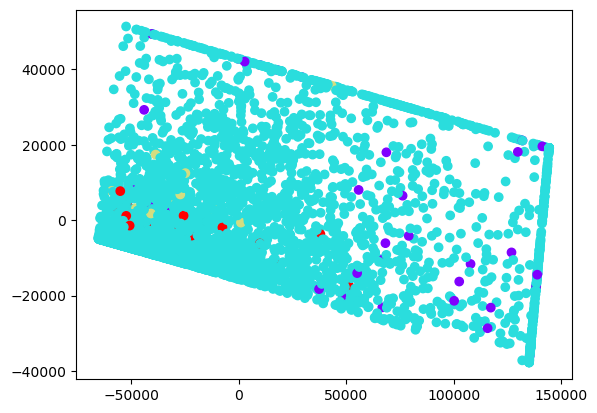

In [98]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["db_cluster"], cmap='rainbow')  
plt.show()

In [99]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["db_cluster"])
print("db_cluster score:", np.round(score,3))

db_cluster score: 0.737


In [100]:
from sklearn.cluster import dbscan
db_cluster = dbscan(X,eps=0.5,min_samples=5)
df["db_cluster"] = db_cluster[1]

In [101]:
df["db_cluster"].value_counts()

db_cluster
 0     2123
 2      588
 1      489
 3      269
 4      263
-1      130
 6       73
 8       23
 7       12
 5       11
 10       7
 11       6
 9        5
Name: count, dtype: int64

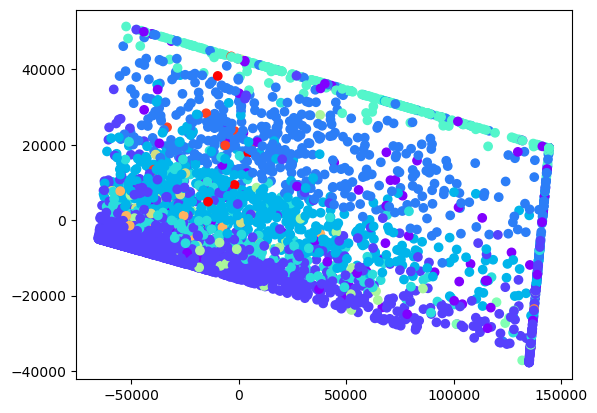

In [102]:
import matplotlib.pyplot as plt
plt.scatter(pc.iloc[:,0], pc.iloc[:,1], c=df["db_cluster"], cmap='rainbow')  
plt.show()

In [103]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,df["db_cluster"])
print("db_cluster score:", np.round(score,3))

db_cluster score: 0.277


# Cluster Analysis and Interpretation:

In [ ]:
#There can be 2 clusters as per silhouette score.
#As data is non-linear , DB Scan method might not be suitable for this case.
#Aglomerative and K-means clustering can produce better results with this particular data set.